<a href="https://colab.research.google.com/github/snish160/AutomatedAPI/blob/main/Python_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [ ]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

In [ ]:
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-12T07:54:05.631Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 10032}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [ ]:
type(data)

dict

In [ ]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973881e+07,1.973881e+07,False,NaN,1,NaN,NaN,None,2024-08-12T07:52:00.000Z,58743.050050,2.738608e+10,87.0948,0.828671,-4.109907,11.444539,1.088072,-13.143982,-5.180410,1.159518e+12,56.1946,1.233604e+12,None,2024-08-12T07:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,None,2024-08-12T07:52:00.000Z,2571.757592,1.554909e+10,73.0202,1.011700,-4.044330,9.080170,-18.028721,-26.578510,-11.844751,3.093060e+11,14.9789,3.093060e+11,None,2024-08-12T07:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
2,825,Tether USDt,USDT,tether,93944,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-12T07:51:00.000Z,1.000306,4.842521e+10,63.6943,-0.001485,-0.000176,-0.058231,0.012065,0.043993,0.079112,1.156740e+11,5.6018,1.171039e+11,None,2024-08-12T07:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 07:54:16.324881
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,None,2024-08-12T07:52:00.000Z,509.703415,1.647965e+09,14.3717,0.933800,-4.566576,16.061597,-4.826249,-15.906943,-13.308988,7.438435e+10,3.6057,7.438435e+10,None,2024-08-12T07:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667333e+08,5.821097e+08,True,NaN,5,NaN,NaN,None,2024-08-12T07:51:00.000Z,146.617781,2.832599e+09,107.5020,2.438812,-6.362837,18.687880,5.254449,-3.503573,0.321836,6.843141e+10,3.3140,8.534764e+10,None,2024-08-12T07:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
5,3408,USDC,USDC,usd-coin,21472,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.455264e+10,3.455264e+10,False,NaN,6,NaN,NaN,None,2024-08-12T07:51:00.000Z,1.000101,5.298956e+09,106.4461,0.004748,-0.005395,-0.063386,0.012102,0.008419,0.003184,3.455612e+10,1.6735,3.455612e+10,None,2024-08-12T07:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 07:54:16.324881
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-12T07:53:00.000Z,0.567178,1.414186e+09,37.3826,0.710278,-4.134717,20.279218,10.496847,16.029676,12.383062,3.182118e+10,1.5410,5.671784e+10,None,2024-08-12T07:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518485e+09,5.110363e+09,True,NaN,8,3.414167e+09,2.124564e+10,None,2024-08-12T07:51:00.000Z,6.222789,3.432613e+08,24.1340,2.288348,-5.604944,18.445744,-15.029361,-17.953124,-11.472161,1.567200e+10,0.7590,3.180071e+10,None,2024-08-12T07:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 07:54:16.324881
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchang

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df2.append(df2)
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [ ]:
import os
import pandas
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print('API run complete')
  sleep(5)
exit()


API run complete
API run complete
API run complete
API run complete
API run complete
API run complete


KeyboardInterrupt: 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.49229,-16.15805,-26.75225,-10.01161,-28.17824,-19.87844
Ethereum,-0.13371,-23.05127,-33.61712,-25.40555,-41.77250,-27.24701
Tether USDt,0.00732,0.06540,0.01216,0.00669,0.03510,0.01249
BNB,-0.61617,-19.28987,-28.34111,-16.92980,-39.83586,-28.49533
Solana,-3.26188,-21.92205,-41.23223,-19.38742,-35.00416,-28.03594
USDC,-0.00915,-0.00788,-0.01179,-0.00299,-0.01996,-0.00250
XRP,-1.51748,-18.34924,-26.69157,2.69155,-15.21263,-16.99002
Toncoin,-1.55347,-16.23104,-25.10382,-33.09094,-30.92351,-15.06998
Dogecoin,-1.76351,-23.48389,-38.46837,-24.43510,-49.45381,-47.69659


In [ ]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.49229
              quote.USD.percent_change_24h   -16.15805
              quote.USD.percent_change_7d    -26.75225
              quote.USD.percent_change_30d   -10.01161
              quote.USD.percent_change_60d   -28.17824
              quote.USD.percent_change_90d   -19.87844
Ethereum      quote.USD.percent_change_1h     -0.13371
              quote.USD.percent_change_24h   -23.05127
              quote.USD.percent_change_7d    -33.61712
              quote.USD.percent_change_30d   -25.40555
              quote.USD.percent_change_60d   -41.77250
              quote.USD.percent_change_90d   -27.24701
Tether USDt   quote.USD.percent_change_1h      0.00732
              quote.USD.percent_change_24h     0.06540
              quote.USD.percent_change_7d      0.01216
              quote.USD.percent_change_30d     0.00669
              quote.USD.percent_change_60d     0.03510
              quote.USD.percent_change_90d     0.01249
BNB           quote.USD.percent_change_1h     -0.61617
              quote.USD.percent_change_24h   -19.28987
              quote.USD.percent_change_7d    -28.34111
              quote.USD.percent_change_30d   -16.92980
              quote.USD.percent_change_60d   -39.83586
              quote.USD.percent_change_90d   -28.49533
Solana        quote.USD.percent_change_1h     -3.26188
              quote.USD.percent_change_24h   -21.92205
              quote.USD.percent_change_7d    -41.23223
              quote.USD.percent_change_30d   -19.38742
              quote.USD.percent_change_60d   -35.00416
              quote.USD.percent_change_90d   -28.03594
USDC          quote.USD.percent_change_1h     -0.00915
              quote.USD.percent_change_24h    -0.00788
              quote.USD.percent_change_7d     -0.01179
              quote.USD.percent_change_30d    -0.00299
              quote.USD.percent_change_60d    -0.01996
              quote.USD.percent_change_90d    -0.00250
XRP           quote.USD.percent_change_1h     -1.51748
              quote.USD.percent_change_24h   -18.34924
              quote.USD.percent_change_7d    -26.69157
              quote.USD.percent_change_30d     2.69155
              quote.USD.percent_change_60d   -15.21263
              quote.USD.percent_change_90d   -16.99002
Toncoin       quote.USD.percent_change_1h     -1.55347
              quote.USD.percent_change_24h   -16.23104
              quote.USD.percent_change_7d    -25.10382
              quote.USD.percent_change_30d   -33.09094
              quote.USD.percent_change_60d   -30.92351
              quote.USD.percent_change_90d   -15.06998
Dogecoin      quote.USD.percent_change_1h     -1.76351
              quote.USD.percent_change_24h   -23.48389
              quote.USD.percent_change_7d    -38.46837
              quote.USD.percent_change_30d   -24.43510
              quote.USD.percent_change_60d   -49.45381
              quote.USD.percent_change_90d   -47.69659
Cardano       quote.USD.percent_change_1h     -1.62414
              quote.USD.percent_change_24h   -19.45719
              quote.USD.percent_change_7d    -31.16299
              quote.USD.percent_change_30d   -19.33458
              quote.USD.percent_change_60d   -36.96313
              quote.USD.percent_change_90d   -36.03410
TRON          quote.USD.percent_change_1h     -0.09234
              quote.USD.percent_change_24h    -7.05211
              quote.USD.percent_change_7d    -12.54817
              quote.USD.percent_change_30d    -7.75436
              quote.USD.percent_change_60d     3.71247
              quote.USD.percent_change_90d    -0.86567
Avalanche     quote.USD.percent_change_1h     -2.19103
              quote.USD.percent_change_24h   -20.82427
              quote.USD.percent_change_7d    -37.68754
              quote.USD.percent_change_30d   -30.73869
              quote.USD.percent_change_60d   -51.46501
              quote.USD.percent_change_90d   -51.543

In [ ]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.49229
             quote.USD.percent_change_24h -16.15805
             quote.USD.percent_change_7d  -26.75225
             quote.USD.percent_change_30d -10.01161
             quote.USD.percent_change_60d -28.17824
             quote.USD.percent_change_90d -19.87844
Ethereum     quote.USD.percent_change_1h   -0.13371
             quote.USD.percent_change_24h -23.05127
             quote.USD.percent_change_7d  -33.61712
             quote.USD.percent_change_30d -25.40555
             quote.USD.percent_change_60d -41.77250
             quote.USD.percent_change_90d -27.24701
Tether USDt  quote.USD.percent_change_1h    0.00732
             quote.USD.percent_change_24h   0.06540
             quote.USD.percent_change_7d    0.01216
             quote.USD.percent_change_30d   0.00669
             quote.USD.percent_change_60d   0.03510
             quote.USD.percent_change_90d   0.01249
BNB          quote.USD.percent_change_1h   -0.61617
             quote.USD.percent_change_24h -19.28987
             quote.USD.percent_change_7d  -28.34111
             quote.USD.percent_change_30d -16.92980
             quote.USD.percent_change_60d -39.83586
             quote.USD.percent_change_90d -28.49533
Solana       quote.USD.percent_change_1h   -3.26188
             quote.USD.percent_change_24h -21.92205
             quote.USD.percent_change_7d  -41.23223
             quote.USD.percent_change_30d -19.38742
             quote.USD.percent_change_60d -35.00416
             quote.USD.percent_change_90d -28.03594
USDC         quote.USD.percent_change_1h   -0.00915
             quote.USD.percent_change_24h  -0.00788
             quote.USD.percent_change_7d   -0.01179
             quote.USD.percent_change_30d  -0.00299
             quote.USD.percent_change_60d  -0.01996
             quote.USD.percent_change_90d  -0.00250
XRP          quote.USD.percent_change_1h   -1.51748
             quote.USD.percent_change_24h -18.34924
             quote.USD.percent_change_7d  -26.69157
             quote.USD.percent_change_30d   2.69155
             quote.USD.percent_change_60d -15.21263
             quote.USD.percent_change_90d -16.99002
Toncoin      quote.USD.percent_change_1h   -1.55347
             quote.USD.percent_change_24h -16.23104
             quote.USD.percent_change_7d  -25.10382
             quote.USD.percent_change_30d -33.09094
             quote.USD.percent_change_60d -30.92351
             quote.USD.percent_change_90d -15.06998
Dogecoin     quote.USD.percent_change_1h   -1.76351
             quote.USD.percent_change_24h -23.48389
             quote.USD.percent_change_7d  -38.46837
             quote.USD.percent_change_30d -24.43510
             quote.USD.percent_change_60d -49.45381
             quote.USD.percent_change_90d -47.69659
Cardano      quote.USD.percent_change_1h   -1.62414
             quote.USD.percent_change_24h -19.45719
             quote.USD.percent_change_7d  -31.16299
             quote.USD.percent_change_30d -19.33458
             quote.USD.percent_change_60d -36.96313
             quote.USD.percent_change_90d -36.03410
TRON         quote.USD.percent_change_1h   -0.09234
             quote.USD.percent_change_24h  -7.05211
             quote.USD.percent_change_7d  -12.54817
             quote.USD.percent_change_30d  -7.75436
             quote.USD.percent_change_60d   3.71247
             quote.USD.percent_change_90d  -0.86567
Avalanche    quote.USD.percent_change_1h   -2.19103
             quote.USD.percent_change_24h -20.82427
             quote.USD.percent_change_7d  -37.68754
             quote.USD.percent_change_30d -30.73869
             quote.USD.percent_change_60d -51.46501
             quote.USD.percent_change_90d -51.54389
Shiba Inu    quote.USD.percent_change_1h   -2.36639
             quote.USD.percent_change_24h -21.74410
             quote.USD.percent_change_7d  -36.00437
             quote.USD.percent_change_30d

In [ ]:
df5.count()

,0
values,90


In [ ]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49229
1,Bitcoin,quote.USD.percent_change_24h,-16.15805
2,Bitcoin,quote.USD.percent_change_7d,-26.75225
3,Bitcoin,quote.USD.percent_change_30d,-10.01161
4,Bitcoin,quote.USD.percent_change_60d,-28.17824
5,Bitcoin,quote.USD.percent_change_90d,-19.87844
6,Ethereum,quote.USD.percent_change_1h,-0.13371
7,Ethereum,quote.USD.percent_change_24h,-23.05127
8,Ethereum,quote.USD.percent_change_7d,-33.61712
9,Ethereum,quote.USD.percent_change_30d,-25.40555


In [ ]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49229
1,Bitcoin,quote.USD.percent_change_24h,-16.15805
2,Bitcoin,quote.USD.percent_change_7d,-26.75225
3,Bitcoin,quote.USD.percent_change_30d,-10.01161
4,Bitcoin,quote.USD.percent_change_60d,-28.17824
5,Bitcoin,quote.USD.percent_change_90d,-19.87844
6,Ethereum,quote.USD.percent_change_1h,-0.13371
7,Ethereum,quote.USD.percent_change_24h,-23.05127
8,Ethereum,quote.USD.percent_change_7d,-33.61712
9,Ethereum,quote.USD.percent_change_30d,-25.40555


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.49229
1,Bitcoin,24h,-16.15805
2,Bitcoin,7d,-26.75225
3,Bitcoin,30d,-10.01161
4,Bitcoin,60d,-28.17824
5,Bitcoin,90d,-19.87844
6,Ethereum,quote.USD.percent_change_1h,-0.13371
7,Ethereum,24h,-23.05127
8,Ethereum,7d,-33.61712
9,Ethereum,30d,-25.40555


In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11623,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19735903.00000,19735903.00000,False,NaN,1,NaN,NaN,None,2024-08-05T10:59:00.000Z,51367.14039,81201024415.36485,196.83800,-2.06372,-15.45092,-26.26291,-9.55454,-27.63393,-19.87358,1013776900198.35181,56.12270,1078709948268.66003,None,2024-08-05T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-05 11:01:23.981370,NaT
1,1027,Ethereum,ETH,ethereum,9188,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120259614.61941,120259614.61941,True,NaN,2,NaN,NaN,None,2024-08-05T10:58:00.000Z,2266.56714,56610849401.76987,255.88670,-1.90095,-22.19374,-33.11903,-24.75439,-41.15783,-26.93193,272576490996.01746,15.09040,272576490996.01999,None,2024-08-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-05 11:01:23.981370,NaT
2,825,Tether USDt,USDT,tether,93527,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114527666301.09631,117068083201.92928,True,NaN,3,NaN,NaN,None,2024-08-05T10:58:00.000Z,1.00028,148542084206.60153,206.29210,0.01706,0.08690,0.01580,0.01638,0.03146,0.03192,114560299780.93526,6.34800,117101440547.42000,None,2024-08-05T10:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-05 11:01:23.981370,NaT
3,1839,BNB,BNB,bnb,2204,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140753861.14556,140753861.14556,False,NaN,4,NaN,NaN,None,2024-08-05T10:58:00.000Z,431.03398,3924231134.11981,126.44070,-2.49196,-18.17998,-27.43515,-15.75210,-39.08014,-27.35428,60669697321.34592,3.36180,60669697321.35000,None,2024-08-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-05 11:01:23.981370,NaT
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465592122.78050,581655507.95524,True,NaN,5,NaN,NaN,None,2024-08-05T10:58:00.000Z,116.14022,10868259602.20058,227.41550,-2.43048,-19.36526,-39.19882,-16.99963,-32.72128,-26.04523,54073969639.98447,2.99630,67553596247.01000,None,2024-08-05T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-05 11:01:23.981370,NaT
5,3408,USDC,USDC,usd-coin,21352,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33550442362.43910,33550442362.43910,False,NaN,6,NaN,NaN,None,2024-08-05T10:58:00.000Z,1.00012,18455736350.47830,254.53840,0.00344,0.02108,0.01622,0.00325,0.00464,0.01831,33554355685.29338,1.85930,33554355685.29000,None,2024-08-05T10:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-05 11:01:23.981370,NaT
6,52,XRP,XRP,xrp,1360,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-05T10:59:00.000Z,0.45151,3250299244.07380,212.30060,-2.53775,-17.86616,-25.90044,3.93276,-13.98669,-16.32161,25284095131.98690,1.40100,45150747203.41000,None,2024-08-05T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-05 11:01:23.981370,NaT
7,11419,Toncoin,TON,toncoin,490,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518146908.48951,5110035051.56634,True,NaN,8,3414166606.00000,17557827418.10519,None,2024-08-05T10:58:00.000Z,5.14264,929686688.10342,286.14810,-2.17695,-14.02336,-24.03991,-32.13244,-2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

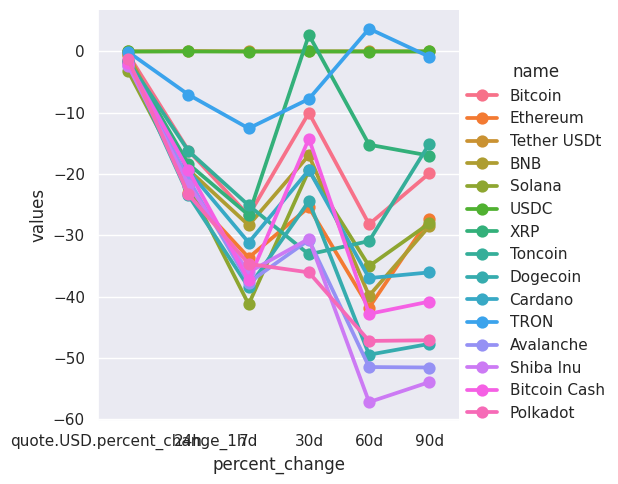

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
df10 = df[['name','quote.USD.price','timestamp']]
# df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,51367.14039,2024-08-05 11:01:23.981370
1,Ethereum,2266.56714,2024-08-05 11:01:23.981370
2,Tether USDt,1.00028,2024-08-05 11:01:23.981370
3,BNB,431.03398,2024-08-05 11:01:23.981370
4,Solana,116.14022,2024-08-05 11:01:23.981370
5,USDC,1.00012,2024-08-05 11:01:23.981370
6,XRP,0.45151,2024-08-05 11:01:23.981370
7,Toncoin,5.14264,2024-08-05 11:01:23.981370
8,Dogecoin,0.08310,2024-08-05 11:01:23.981370
9,Cardano,0.29552,2024-08-05 11:01:23.981370


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

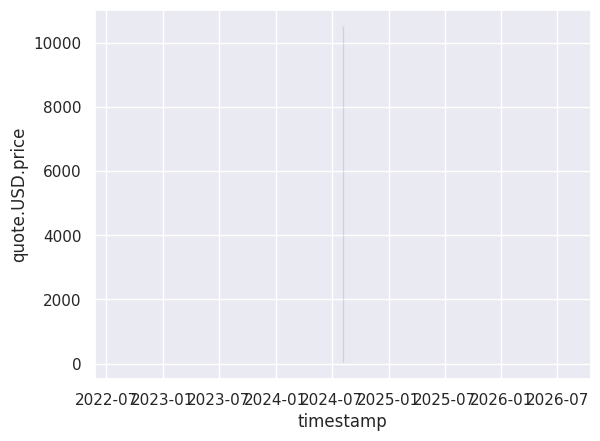

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)